In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis of the Birthday Data Set

In [27]:
# load data
data = pd.read_csv('../data/birth_data.csv')
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['ids'] = np.arange(1, data.shape[0]+1)
data

,year,month,day,births,day_of_year,day_of_week,date,ids
0,1969,1,1,8486,1,3,1969-01-01,1
1,1969,1,2,9002,2,4,1969-01-02,2
2,1969,1,3,9542,3,5,1969-01-03,3
3,1969,1,4,8960,4,6,1969-01-04,4
4,1969,1,5,8390,5,7,1969-01-05,5
...,...,...,...,...,...,...,...,...
7300,1988,12,27,11528,362,2,1988-12-27,7301
7301,1988,12,28,11847,363,3,1988-12-28,7302
7302,1988,12,29,11704,364,4,1988-12-29,7303
7303,1988,12,30,11837,365,5,1988-12-30,7304


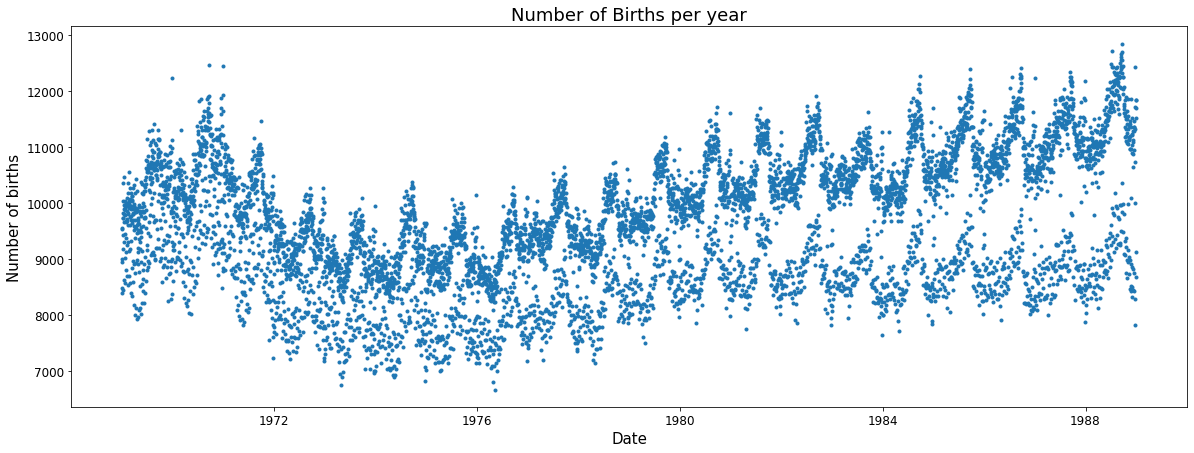

In [28]:
# data plot

plt.figure(figsize=(20,7))
plt.plot(data.date, data.births, '.')
plt.xlabel('Date',  fontsize=15)
plt.ylabel('Number of births', fontsize=15)
plt.title('Number of Births per year', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('../plots/eda/births_per_yr.pdf')

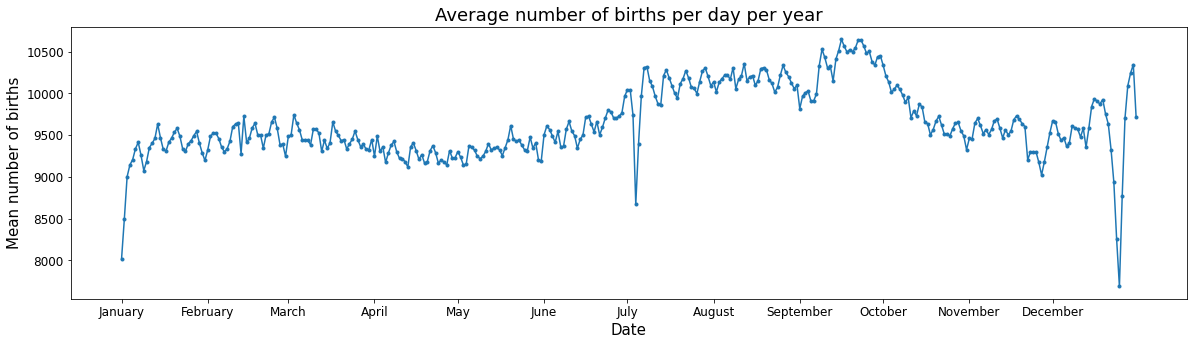

In [29]:
# avg births 

mean_day_per_yr = data.groupby(by='day_of_year').mean('births')

def get_xticks(data):
    idss = []; months = []
    month = 1
    for i in range(12):
        df = data.loc[data.month == month+i]
        months.append(month+i)
        idss.append(df.index[0])
    return idss, months
pos, _ = get_xticks(mean_day_per_yr)

plt.figure(figsize=(20,5))
plt.plot(mean_day_per_yr.index, mean_day_per_yr.births, '.-')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mean number of births', fontsize=15)
plt.title('Average number of births per day per year', fontsize=18)
plt.xticks(pos,['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('../plots/eda/avg_births_per_day.pdf')

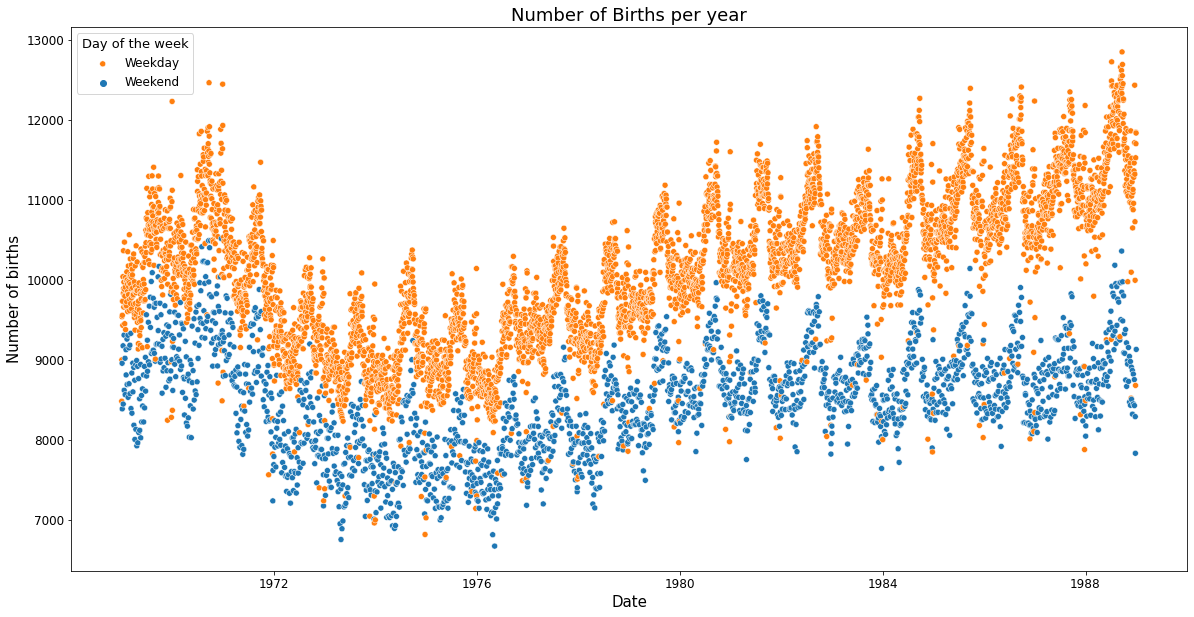

In [30]:
# weekday or weekend

data['weekday'] = data.day_of_week.apply(lambda x: 1 if x in [1,2,3,4,5] else 0)

plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='date', y='births', hue='weekday')
plt.xlabel('Date',  fontsize=15)
plt.ylabel('Number of births', fontsize=15)
plt.title('Number of Births per year', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Day of the week', labels=['Weekday', 'Weekend'], fontsize=12).get_title().set_fontsize('13')
plt.savefig('../plots/eda/births_per_yr_with_weekday_flag.pdf')

In [31]:
# births relative to 100

# data['births_relative100'] = data.births.apply(lambda x: x/np.mean(data.births)*100)

# plt.figure(figsize=(20,5))
# plt.plot(data.date, data.births_relative100, '.')
# plt.xlabel('Date')
# plt.ylabel('Relative number of births')
# plt.title('Relative births')

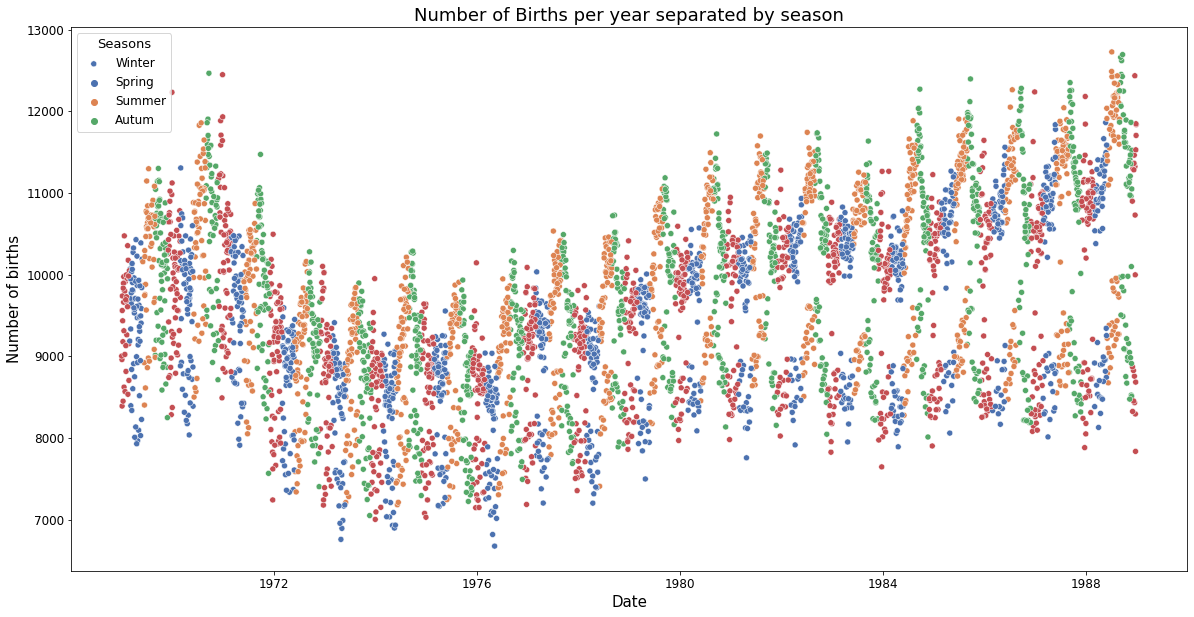

In [32]:
# all the data and seasons

def set_season(x):
    if x in [3,4,5]:
        return 1
    if x in [6,7,8]:
        return 2
    if x in [9,10,11]:
        return 3 
    else:
        return 4

data['seasons'] = data.month.apply(set_season)

plt.figure(figsize=(20,10))
sns.scatterplot(data=data.sample(frac=0.7), x='date', y='births', hue='seasons', palette="deep")

plt.xlabel('Date',  fontsize=15)
plt.ylabel('Number of births', fontsize=15)
plt.title('Number of Births per year separated by season', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Seasons', labels=['Winter', 'Spring', 'Summer', 'Autum'], fontsize=12).get_title().set_fontsize('13')
plt.savefig('../plots/eda/births_per_yr_with_seasons.pdf')

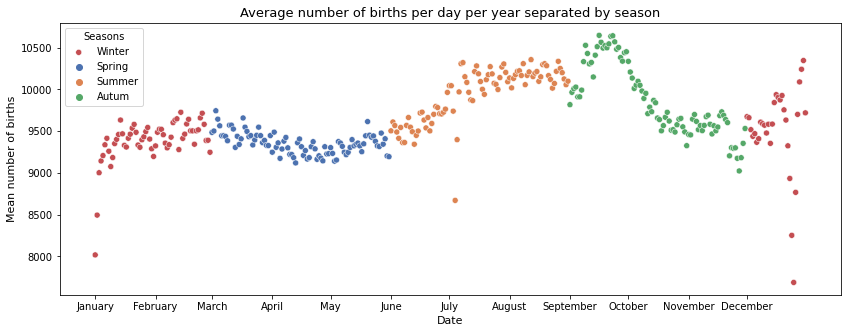

In [33]:
# avg births and seasons

mean_day_per_yr['seasons'] = mean_day_per_yr.month.apply(set_season)
mean_day_per_yr['day_yr'] = mean_day_per_yr.index

plt.figure(figsize=(14,5))
sns.scatterplot(data=mean_day_per_yr, x='day_yr', y='births', hue='seasons', palette="deep")
plt.legend(title='Seasons', labels=['Winter', 'Spring', 'Summer', 'Autum'])

plt.xlabel('Date', fontsize=11)
plt.ylabel('Mean number of births', fontsize=11)
plt.title('Average number of births per day per year separated by season', fontsize=13)
plt.xticks(pos,['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('../plots/eda/avg_births_per_day_with_seasons.pdf')

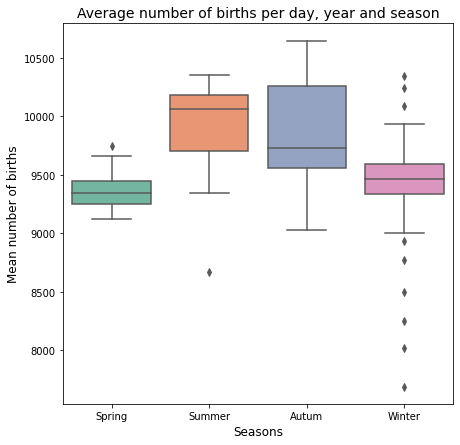

In [34]:
# season distribution on average, boxplot

plt.figure(figsize=(7,7))
p = sns.boxplot(data=mean_day_per_yr, x='seasons', y='births', palette="Set2")
p.set(xticklabels=['Spring', 'Summer', 'Autum', 'Winter']);

plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Mean number of births', fontsize=12)
plt.title('Average number of births per day, year and season', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('../plots/eda/box_plot_avg_births_per_day_season.pdf')

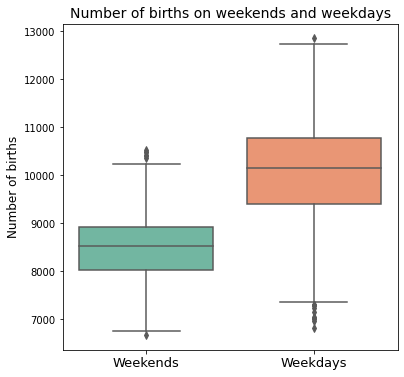

In [35]:
# boxplot of weekdays and weekends

plt.figure(figsize=(6,6))
p1 = sns.boxplot(data=data, x='weekday', y='births', palette="Set2")
p1.set(xticklabels=['Weekends', 'Weekdays']);

plt.xlabel('')
plt.ylabel('Number of births', fontsize=12)
plt.title('Number of births on weekends and weekdays', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.savefig('../plots/eda/box_plot_births_per_weekends.pdf')

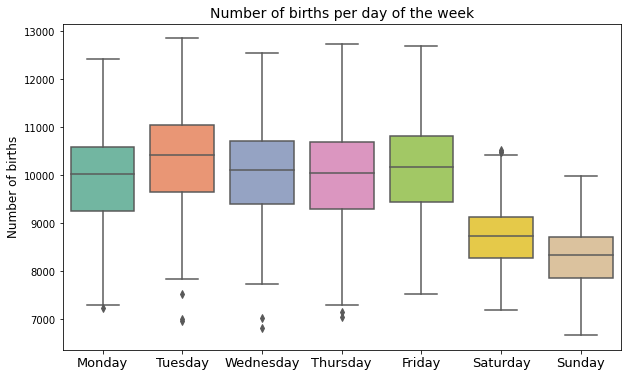

In [36]:
# boxplot of day of week

plt.figure(figsize=(10,6))
p1 = sns.boxplot(data=data, x='day_of_week', y='births', palette="Set2")
p1.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

plt.xlabel('')
plt.ylabel('Number of births', fontsize=12)
plt.title('Number of births per day of the week', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.savefig('../plots/eda/box_plot_births_per_dayofweek.pdf')

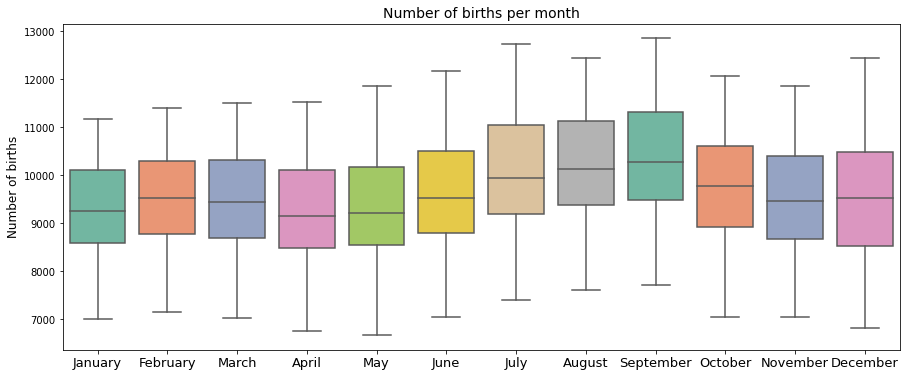

In [37]:
# boxplot of month

plt.figure(figsize=(15,6))
p1 = sns.boxplot(data=data, x='month', y='births', palette="Set2")
p1.set(xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);

plt.xlabel('')
plt.ylabel('Number of births', fontsize=12)
plt.title('Number of births per month', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.savefig('../plots/eda/box_plot_births_per_month.pdf')